## 생육정보 EDA

- 데이터 구조 파악
- 컬럼의 종속성 (PK) 파악

### 필요한 라이브러리 불러오기

In [1]:
# 표준 라이브러리
import sys
from pathlib import Path
from itertools import combinations

# 서드파티 라이브러리
import pandas as pd

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR, growth_map, energy_map
from utils import eda_missing_data, eda_duplicates, plot_features

In [2]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False

# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

### 생육정보 원본 데이터 불러오기

In [ ]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d'
}

growth_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '22_생육정보.csv', **pandas_kwargs)
growth_data.head()

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.0,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.0,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.0,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.0,9.5


In [4]:
# 생육정보 데이터 크기: 특히 행 개수는 중복 체크 때 중요
display(growth_data.shape)

# 생육정보 컬럼들: 컬럼 파악 및 복사 붙이기 용도
display(growth_data.columns)

(48, 13)

Index(['measDate', 'farm_cde', 'itemCode', 'flowerTop', 'grwtLt', 'lefCunt',
       'lefLt', 'lefBt', 'stemThck', 'flanGrupp', 'frtstGrupp', 'hvstGrupp',
       'frtstCo'],
      dtype='object')

### 생육정보 결측치 탐색

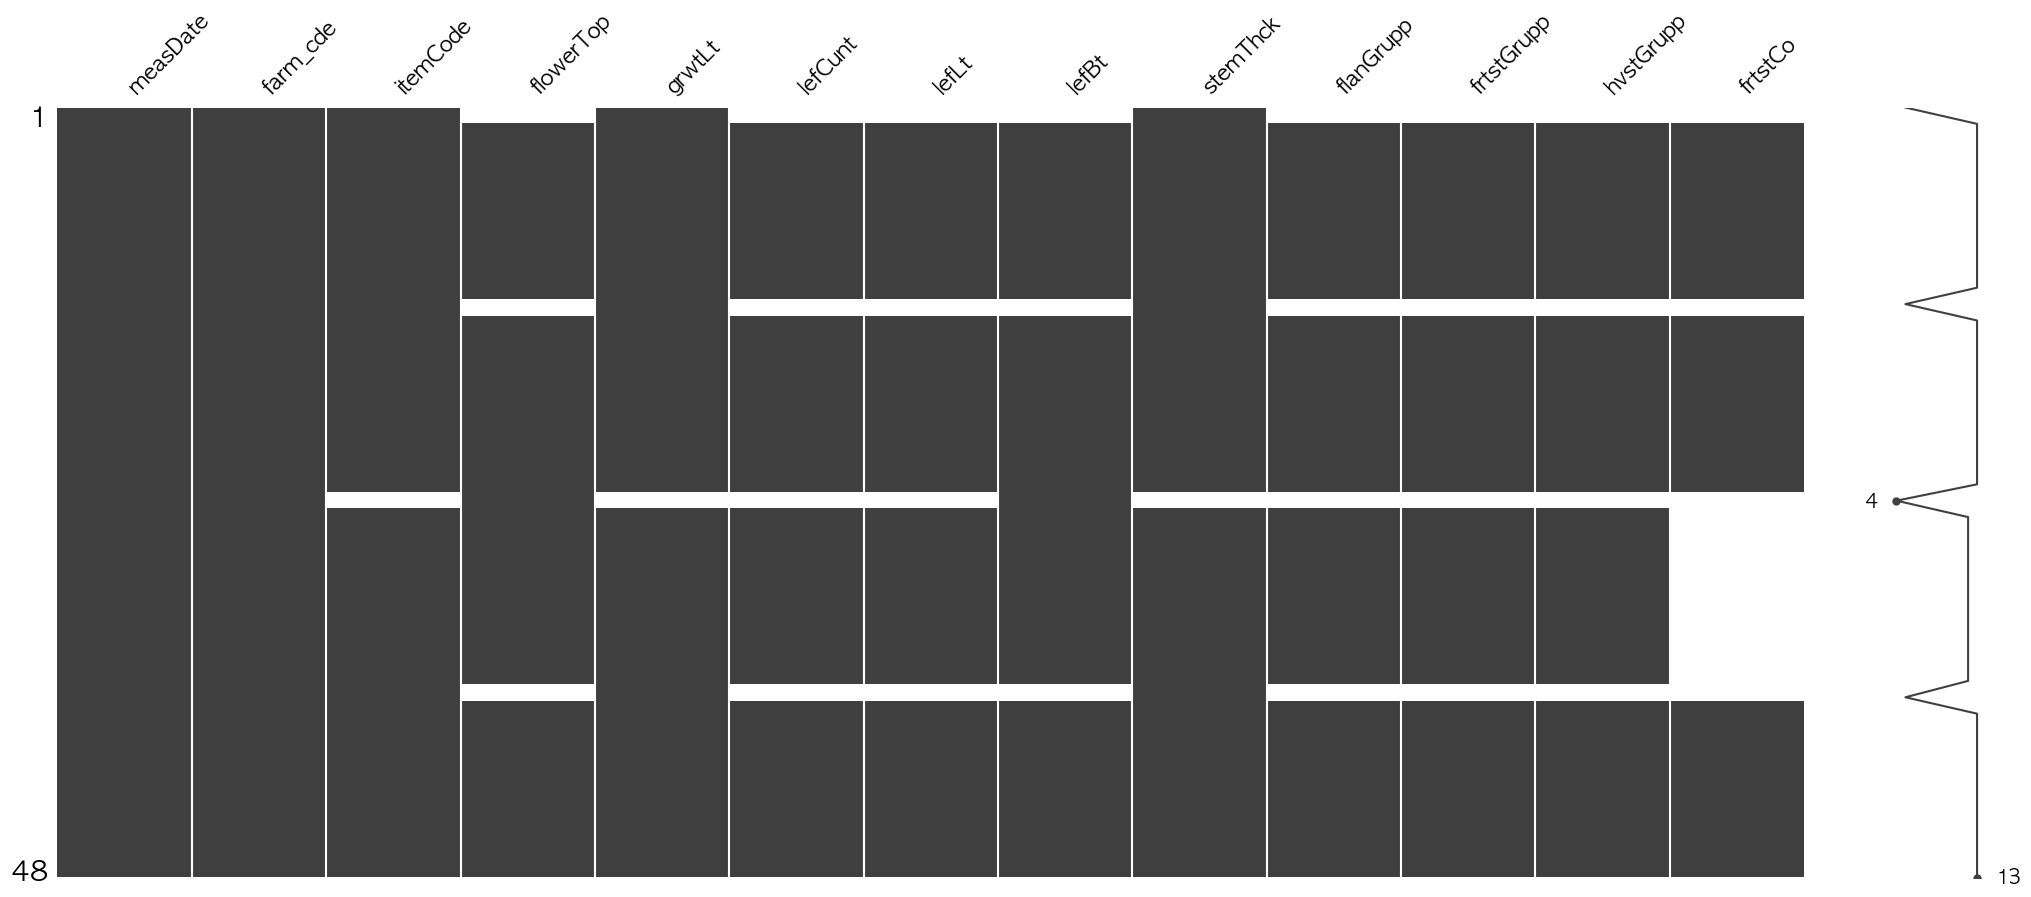

measDate       0
farm_cde       0
itemCode       1
flowerTop      3
grwtLt         1
lefCunt        4
lefLt          4
lefBt          3
stemThck       1
flanGrupp      4
frtstGrupp     4
hvstGrupp      4
frtstCo       15
dtype: int64

In [5]:
eda_missing_data(growth_data)

### 생육정보 PK 탐색

In [6]:
# 생육정보 중복 정보 
display(growth_data.duplicated().value_counts())

False    48
Name: count, dtype: int64

In [7]:
# 단일 PK 탐색
growth_data.nunique()

measDate      12
farm_cde       4
itemCode      12
flowerTop     44
grwtLt        45
lefCunt       40
lefLt         44
lefBt         45
stemThck      47
flanGrupp     44
frtstGrupp    36
hvstGrupp     22
frtstCo       29
dtype: int64

In [8]:
# 이중 PK 탐색 (정의서에 필수라고 적힌 세 가지 column 기준)
columns = ['measDate', 'farm_cde', 'itemCode']

for cols in combinations(columns, 2):
    print('='*50)
    print(f'{"와 ".join([growth_map[col] for col in cols])}의 PK 검사')
    print('='*50)
    display(growth_data.duplicated(subset=cols).value_counts())

측정일와 온실번호의 PK 검사


False    48
Name: count, dtype: int64

측정일와 품목코드의 PK 검사


False    24
True     24
Name: count, dtype: int64

온실번호와 품목코드의 PK 검사


True     33
False    15
Name: count, dtype: int64

In [9]:
# itemCode가 한 종류가 아니므로 체크
growth_data['itemCode'].value_counts()

itemCode
80300.00    36
23.79        1
20.03        1
17.91        1
23.20        1
19.44        1
12.35        1
28.15        1
16.08        1
20.65        1
24.69        1
29.49        1
Name: count, dtype: int64

## 토마토 생육 정보만 EDA

In [ ]:
tomato_cond = growth_data['itemCode'] == 80300
tomato_data: pd.DataFrame = growth_data[tomato_cond].copy()

tomato_data.head()

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.0,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.0,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.0,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.0,9.5


### 토마토 생육정보 결측치 검사

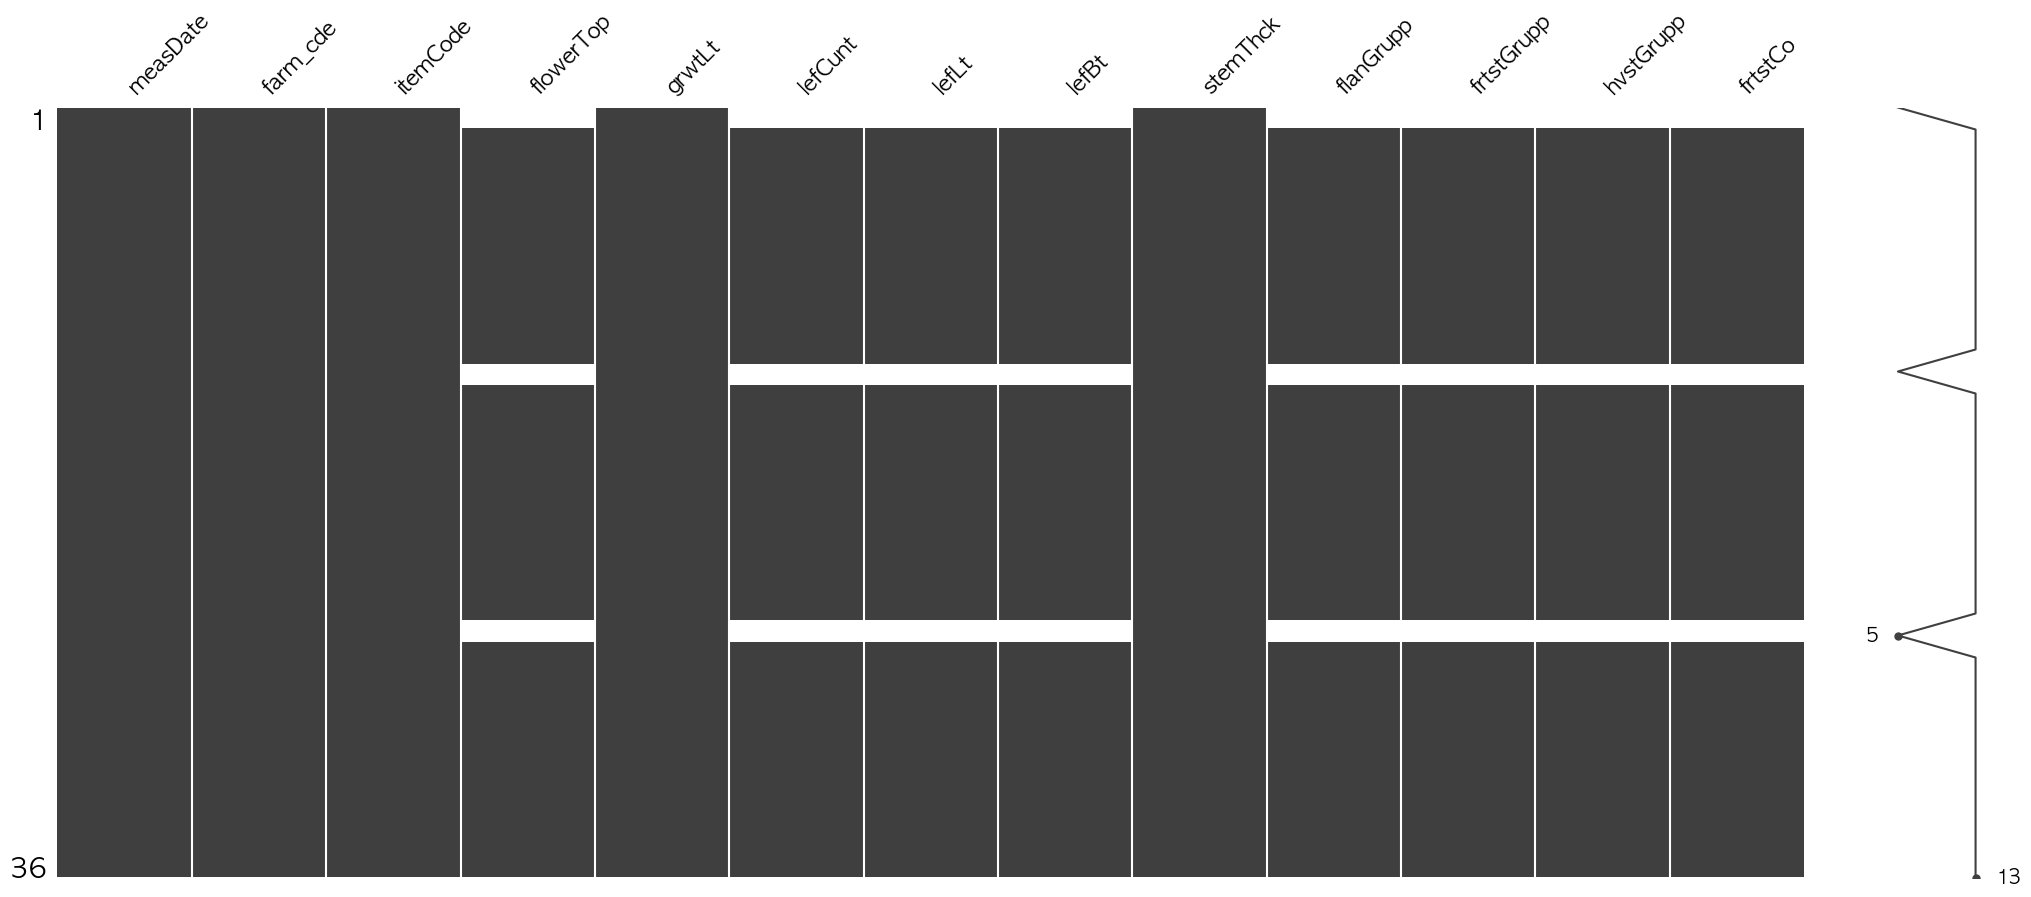

measDate      0
farm_cde      0
itemCode      0
flowerTop     3
grwtLt        0
lefCunt       3
lefLt         3
lefBt         3
stemThck      0
flanGrupp     3
frtstGrupp    3
hvstGrupp     3
frtstCo       3
dtype: int64

In [11]:
# 결측치 검사: 필터링 이후에 결측치 처리 판단이 달라질 수 있기 때문에
eda_missing_data(tomato_data)

### 토마토 생육정보 PK 검사

In [12]:
columns = ['measDate', 'farm_cde']
eda_duplicates(tomato_data, columns=columns)

'=================================================='

'컬럼 1개 PK 검사'

'=================================================='

'측정일의 PK 검사'

True     24
False    12
Name: count, dtype: int64

'온실번호의 PK 검사'

True     33
False     3
Name: count, dtype: int64

'=================================================='

'컬럼 2개 PK 검사'

'=================================================='

'측정일와 온실번호의 PK 검사'

False    36
Name: count, dtype: int64

### 토마토 생육정보 각 컬럼 시각화

In [23]:
tomato_mapping_data = tomato_data.rename(columns=growth_map, copy=True)
tomato_mapping_data

,측정일,온실번호,품목코드,화방높이(cm),생장길이(cm),엽수(개),엽장(cm),엽폭(cm),줄기직경(mm),개화수준(점),착과수준(점),수확중 화방수준(점),열매수(개)
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.0,23.01,19.19,13.7,41.69,37.22,9.175,3.96,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.0,17.14,18.28,14.4,37.19,34.48,9.019,4.46,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.0,15.78,9.04,14.0,38.04,30.36,6.585,5.20,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.0,22.99,14.75,15.8,39.91,39.01,7.371,5.34,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.0,38.93,19.61,14.1,40.48,42.08,8.802,5.36,5.24,0.08,19.8


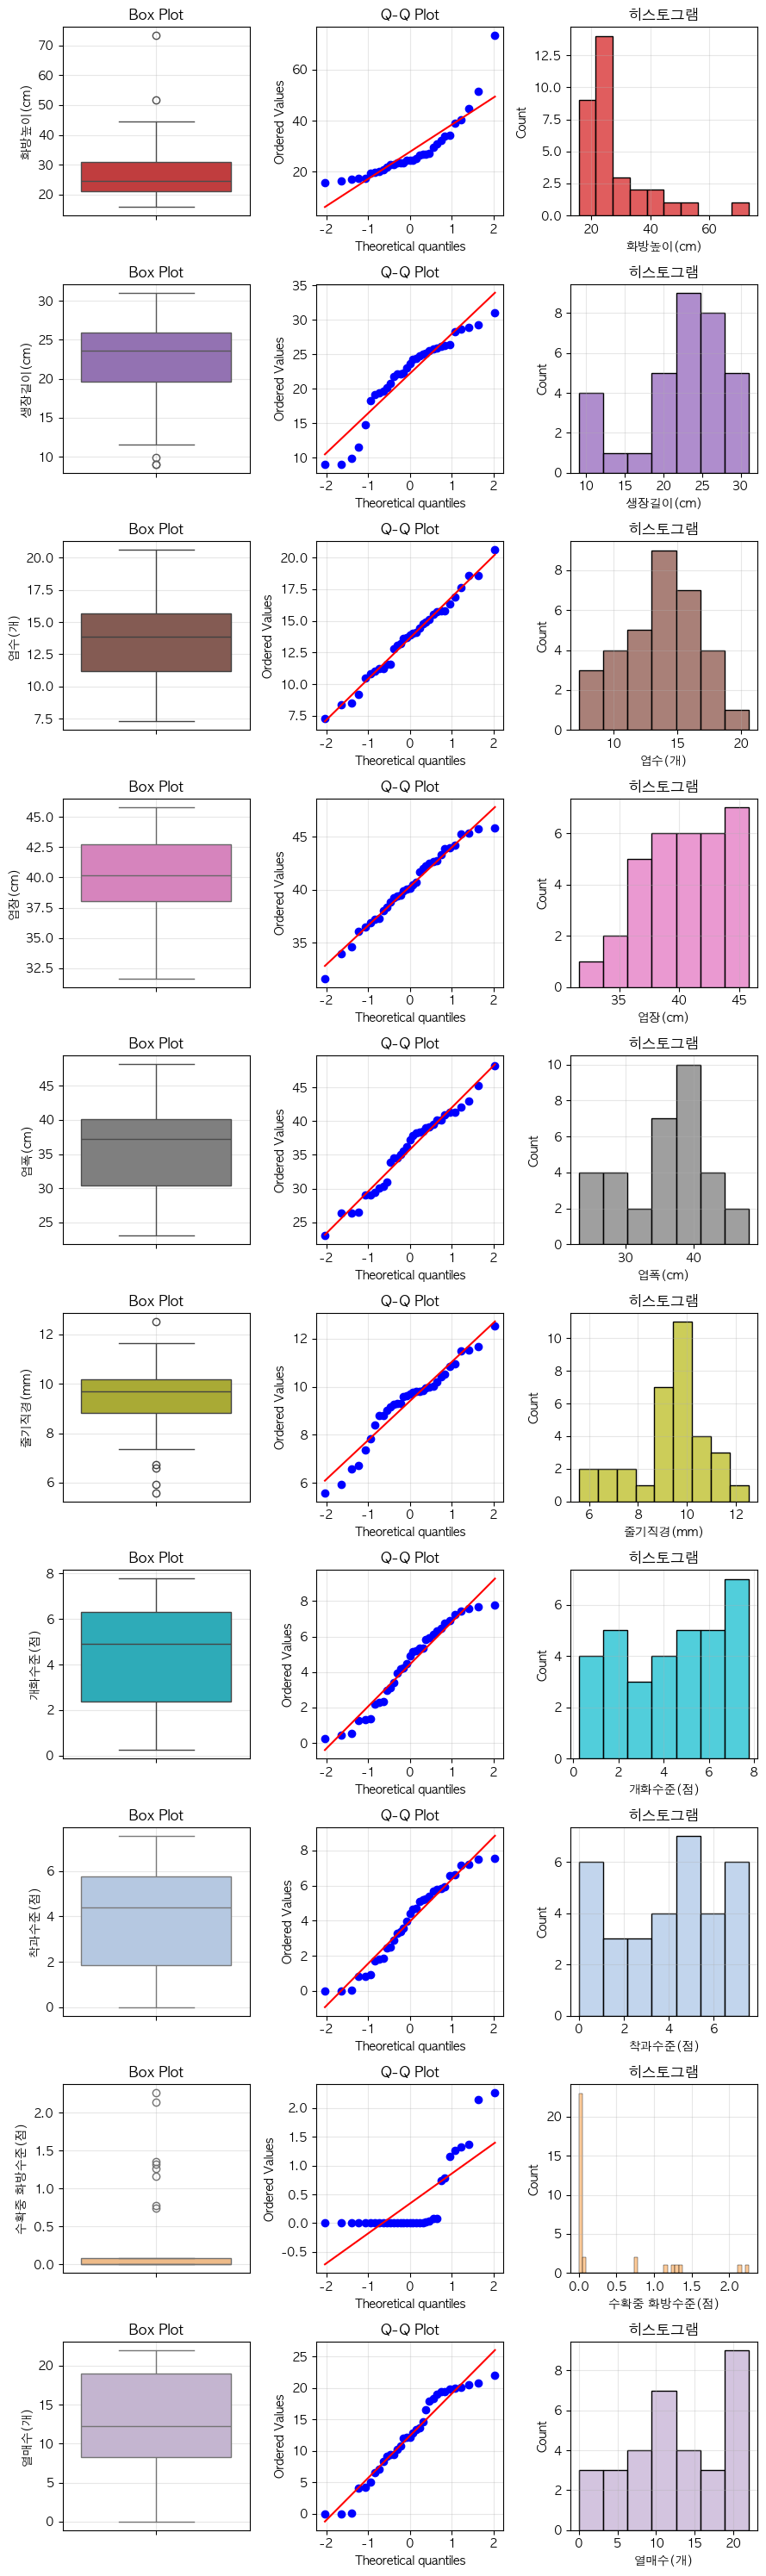

In [25]:
features = ["화방높이(cm)", "생장길이(cm)", "엽수(개)", "엽장(cm)", "엽폭(cm)", "줄기직경(mm)", "개화수준(점)", "착과수준(점)", "수확중 화방수준(점)", "열매수(개)"]

colors = [
    # "#1f77b4",  # measDate
    # "#ff7f0e",  # farm_cde
    # "#2ca02c",  # itemCode
    "#d62728",  # flowerTop
    "#9467bd",  # grwtLt
    "#8c564b",  # lefCunt
    "#e377c2",  # lefLt
    "#7f7f7f",  # lefBt
    "#bcbd22",  # stemThck
    "#17becf",  # flanGrupp
    "#aec7e8",  # frtstGrupp
    "#ffbb78",  # hvstGrupp
    "#c5b0d5"   # frtstCo
]


plot_features(tomato_mapping_data.dropna(), features, colors)

In [13]:
tomato_data.describe()

,measDate,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
count,36,36.0,33.000000,36.000000,33.000000,33.000000,33.000000,36.000000,33.000000,33.000000,33.000000,33.000000
mean,2022-11-03 14:00:00,80300.0,27.838788,22.014444,13.645455,40.306364,35.783939,9.303389,4.434545,3.952727,0.340606,12.418182
min,2022-09-26 00:00:00,80300.0,15.780000,9.040000,7.300000,31.630000,23.020000,5.584000,0.240000,0.000000,0.000000,0.000000
25%,2022-10-15 06:00:00,80300.0,20.940000,19.902500,11.200000,38.040000,30.360000,8.524250,2.360000,1.840000,0.000000,8.300000
50%,2022-11-03 12:00:00,80300.0,24.510000,22.675000,13.900000,40.180000,37.220000,9.605000,4.900000,4.400000,0.000000,12.200000
75%,2022-11-22 18:00:00,80300.0,31.010000,25.847500,15.700000,42.720000,40.140000,10.068250,6.320000,5.760000,0.080000,19.000000
max,2022-12-12 00:00:00,80300.0,73.320000,31.040000,20.600000,45.830000,48.180000,12.529000,7.780000,7.560000,2.260000,22.000000
std,NaN,0.0,11.641637,5.604261,3.133597,3.581865,6.061790,1.582176,2.334728,2.356792,0.650836,6.614683


## 에너지사용정보 EDA

- 평균과 이상치 파악
- 온실 전체에 대해서
- 이상치가 나오는 온실에 대해서

In [ ]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d'
}

energy_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '22_에너지사용정보.csv', **pandas_kwargs)
energy_data.head()

,measDate,farm_cde,water_usage,water_cost,fertilizer_usage,fertilizer_cost,heating_energy_usage,heating_energy_cost,CO2_usage,CO2_cost,mist_usage_time,mist_cost
0,2022-10-01,천지인술,1200,180,3632,4576,0,0,0,0,186,2172
1,2022-10-02,천지인술,90,13,288,362,0,0,0,0,0,0
2,2022-10-03,천지인술,440,66,1452,1829,0,0,0,0,0,0
3,2022-10-04,천지인술,600,90,1802,2270,0,0,0,0,0,0
4,2022-10-05,천지인술,1020,153,3064,3860,18620,1024,0,0,102,1191


In [15]:
# 에너지사용정보 데이터 크기: 특히 행 개수는 중복 체크 때 중요
display(energy_data.shape)

# 에너지사용정보 컬럼들: 컬럼 파악 및 복사 붙이기 용도
display(energy_data.columns)

(280, 12)

Index(['measDate', 'farm_cde', 'water_usage', 'water_cost', 'fertilizer_usage',
       'fertilizer_cost', 'heating_energy_usage', 'heating_energy_cost',
       'CO2_usage', 'CO2_cost', 'mist_usage_time', 'mist_cost'],
      dtype='object')

### 에너지사용정보 결측치 탐색

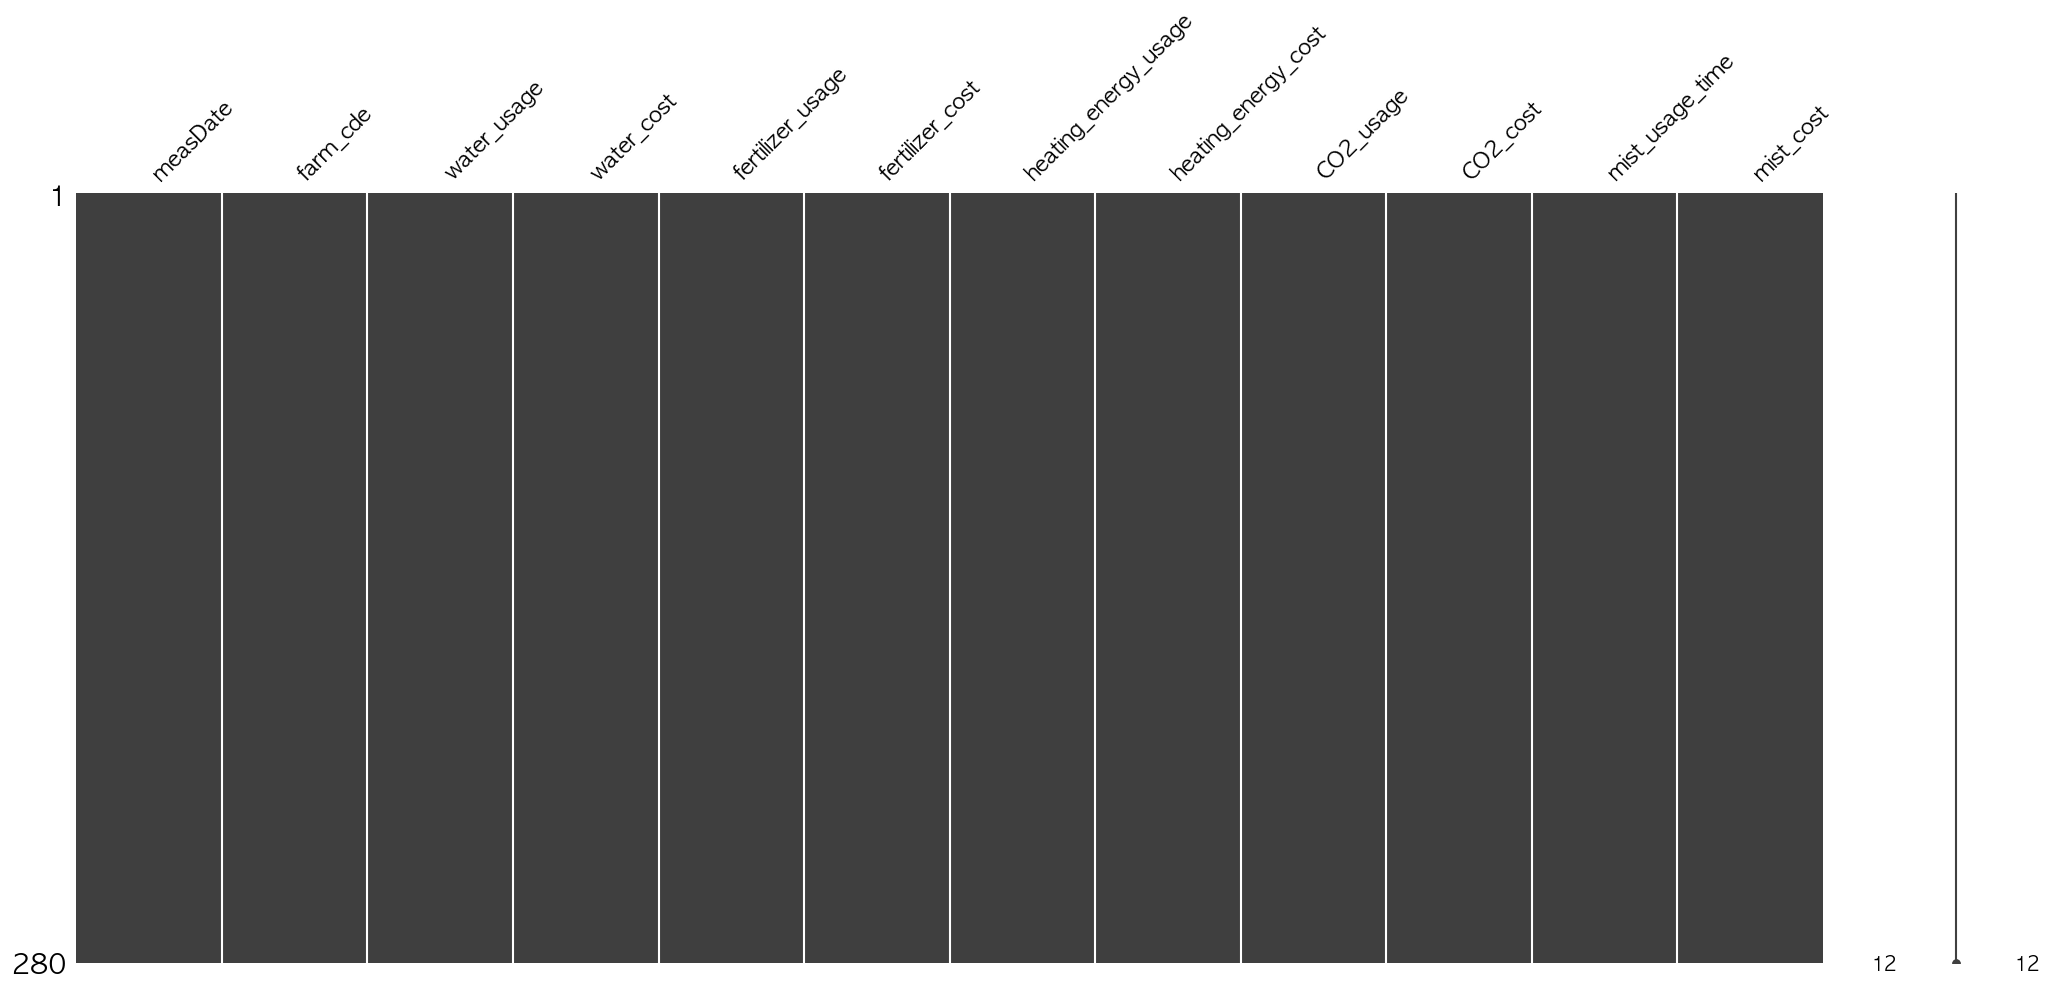

measDate                0
farm_cde                0
water_usage             0
water_cost              0
fertilizer_usage        0
fertilizer_cost         0
heating_energy_usage    0
heating_energy_cost     0
CO2_usage               0
CO2_cost                0
mist_usage_time         0
mist_cost               0
dtype: int64

In [16]:
eda_missing_data(energy_data)

In [ ]:
# 에너지사용정보 중복 정보 
display(energy_data.duplicated().value_counts())

In [ ]:
columns = ['measDate', 'farm_cde']
eda_duplicates(energy_data, columns)

In [19]:
energy_mapping_data = energy_data.rename(columns=energy_map, copy=True)
energy_mapping_data

,측정일,온실번호,물사용량(L),물사용비용(원),비료사용량(L),비료사용비용(원),난방에너지사용량(kcal),난방에너지사용비용(원),CO₂사용량(L),CO₂사용비용(원),미스트사용시간(분),미스트사용비용(원)
0,2022-10-01,천지인술,1200,180,3632,4576,0,0,0,0,186,2172
1,2022-10-02,천지인술,90,13,288,362,0,0,0,0,0,0
2,2022-10-03,천지인술,440,66,1452,1829,0,0,0,0,0,0
3,2022-10-04,천지인술,600,90,1802,2270,0,0,0,0,0,0
4,2022-10-05,천지인술,1020,153,3064,3860,18620,1024,0,0,102,1191
...,...,...,...,...,...,...,...,...,...,...,...,...
275,2022-12-05,토마토명가,1690,253,4966,6257,102010,5610,0,0,14,163
276,2022-12-06,토마토명가,650,97,1976,2489,114815,6314,0,0,14,163
277,2022-12-07,토마토명가,1040,156,3029,3816,89470,4920,0,0,2,23
278,2022-12-08,토마토명가,1950,292,5226,6584,74880,4118,0,0,3,35


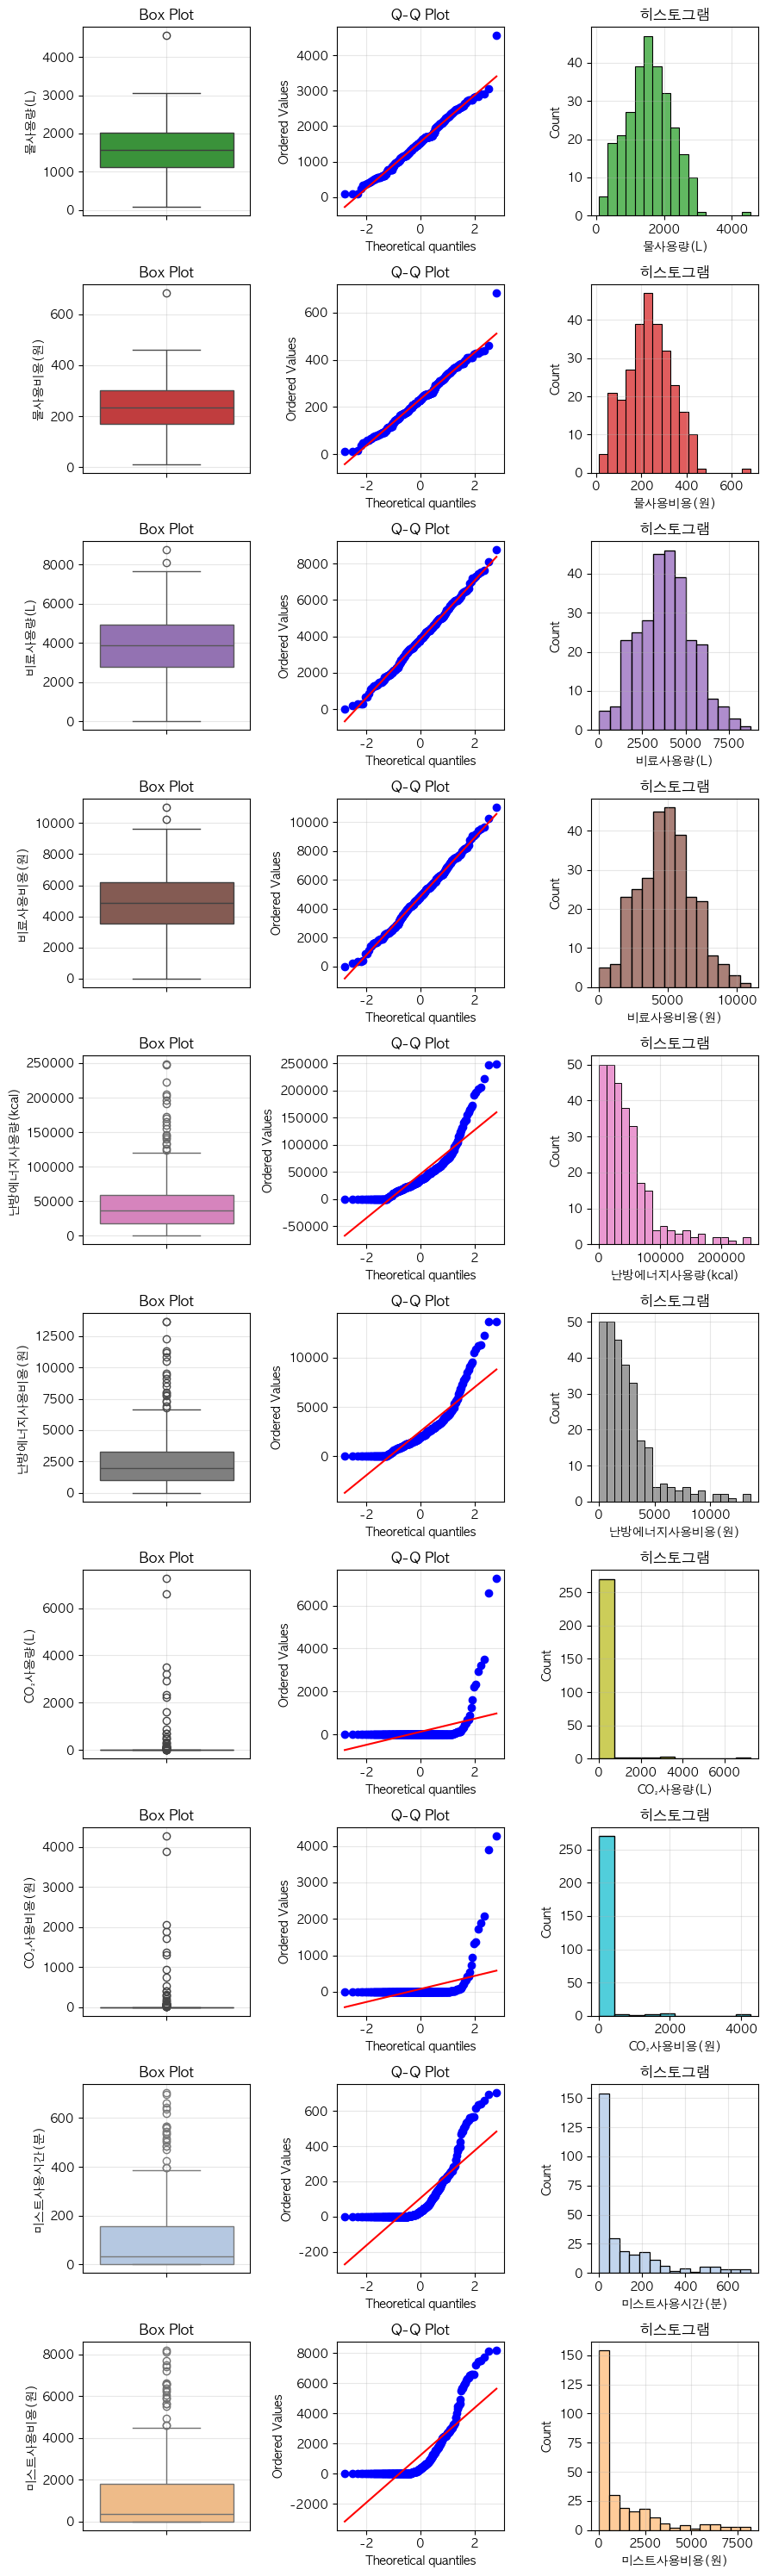

In [21]:
features = ["물사용량(L)", "물사용비용(원)", "비료사용량(L)", "비료사용비용(원)", "난방에너지사용량(kcal)", "난방에너지사용비용(원)", "CO₂사용량(L)", "CO₂사용비용(원)", "미스트사용시간(분)", "미스트사용비용(원)"]

colors = [
    # "#1f77b4",  # measDate
    # "#ff7f0e",  # farm_cde
    "#2ca02c",  # water_usage
    "#d62728",  # water_cost
    "#9467bd",  # fertilizer_usage
    "#8c564b",  # fertilizer_cost
    "#e377c2",  # heating_energy_usage
    "#7f7f7f",  # heating_energy_cost
    "#bcbd22",  # CO2_usage
    "#17becf",  # CO2_cost
    "#aec7e8",  # mist_usage_time
    "#ffbb78"   # mist_cost
]


plot_features(energy_mapping_data, features, colors)